<a href="https://colab.research.google.com/github/vbaezfortunato/Proyecto-Final/blob/master/Deployment_proyecto_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import tensorflow.compat.v1 as tf
import pandas as pd
from sklearn.svm import SVC
from sklearn.externals import joblib
import sklearn as sk
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from tensorflow import keras
import imageio as imio
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals import joblib
from sklearn import tree
import graphviz
import datetime 
from scipy import stats
import seaborn as sns
from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [92]:
deploy = pd.read_csv('/content/gdrive/My Drive/Titanicdeployment.csv',header=None)
deploy


,0,1,2,3,4,5,6,7,8,9,10
0,0.346569,0.0,0.0,0.028221,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.346569,0.0,0.0,0.014737,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.082684,4.0,1.0,0.056848,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.346569,1.0,0.0,0.285990,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.359135,0.0,2.0,0.029758,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
174,0.158080,0.0,0.0,0.014110,0.0,1.0,0.0,1.0,0.0,0.0,1.0
175,0.346569,0.0,0.0,0.015713,1.0,0.0,0.0,1.0,0.0,0.0,0.0
176,0.384267,1.0,0.0,0.221098,0.0,1.0,0.0,0.0,0.0,1.0,1.0
177,0.283740,0.0,0.0,0.015330,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [93]:
X = deploy.values

In [94]:
deploy_y = pd.read_csv('/content/gdrive/My Drive/Titanicdeployment_Y.csv',header=None)
Y =deploy_y.values


In [95]:
decision_tree = joblib.load("/content/gdrive/My Drive/decision_tree.pkl")

In [96]:
svm = joblib.load("/content/gdrive/My Drive/svm.pkl")

In [97]:
 param_regLog = np.load("/content/gdrive/My Drive/regLogParams.npz")

In [98]:

estimator = [decision_tree,svm,param_regLog]

In [114]:
param_regLog

Predecir el deploy

In [120]:
def predict(estimator,features):
    
    pred = [] 
    
   
    pred.append(estimator[0].predict(features)) #0 es el modelo decision tree
    
    ##dibujando el arbol 
    dot_data = tree.export_graphviz(estimator[0],out_file=None,filled=True, rounded=True,special_characters=True)
    graph1 = graphviz.Source(dot_data)
    
    ##svm
    pred.append(estimator[1].predict(features)) #1 es el modelo svm
    
    ##reglogistica

    ##bayes
    
    ##votacion
    prediccion = stats.mode(pred)[0]
    

    print("Predict", pred)
 
    return graph1

Predict [array([0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32), array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 

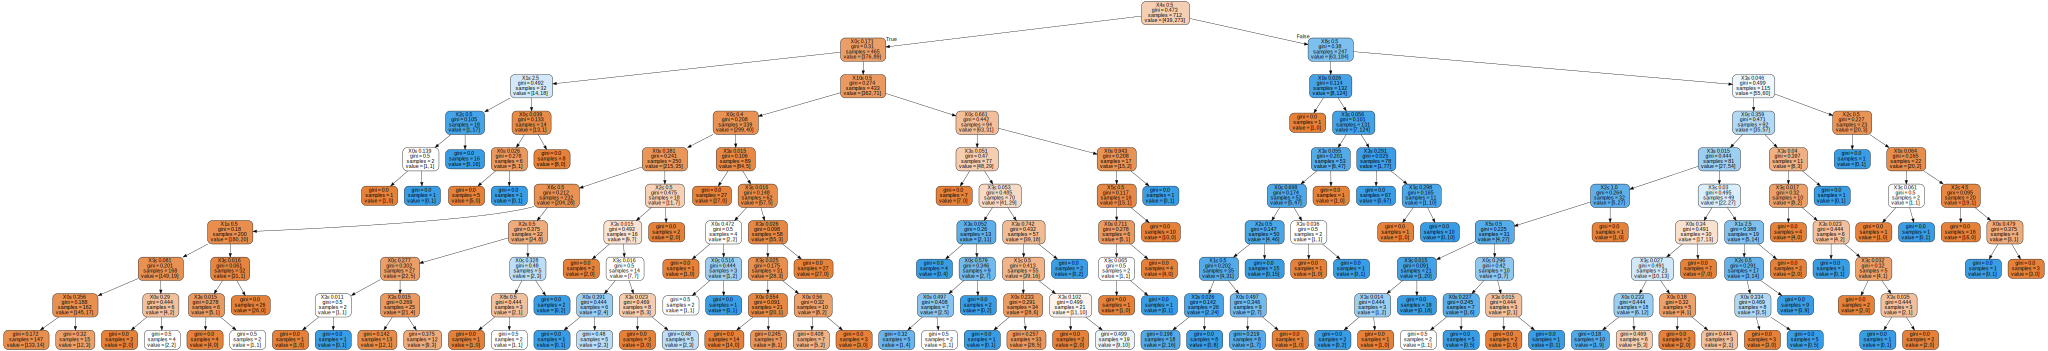

In [123]:
predict(estimator,X)